In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator, MonthLocator, YearLocator
from matplotlib.ticker import FixedFormatter
import seaborn as sns

import sys, os
import datetime

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [12]:
# Custom modules
sys.path.append("../src/utils")
from eda_tools import *
from evaluate_model import *

In [6]:
df = pd.read_csv("../walmart_sales/train_payload2_azureml v3.4.csv")
df.head()

,Region,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,151315
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,151315
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,151315
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,151315


In [7]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

In [8]:
df_region1 = df.loc[df["Region"] == 1, ]

In [10]:
df["Region"].nunique()

12

In [115]:
def plot_timeseries(group, time, value, df):

    fig, ax = plt.subplots(figsize=(12, 6))

    ax=sns.lineplot(x=time, y=value, hue=group, data=df, 
    legend="full", palette=sns.color_palette("Paired", df[group].nunique() ))
    ax.set_xlabel("Time")
    ax.set_ylabel("Weekly Sales")
    ax.xaxis.set_minor_locator(MonthLocator())
    ax.xaxis.set_minor_formatter(DateFormatter("%b"))
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_major_formatter(DateFormatter('\n\n%Y'))

    ax.xaxis.remove_overlapping_locs = False

    plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
    plt.show()

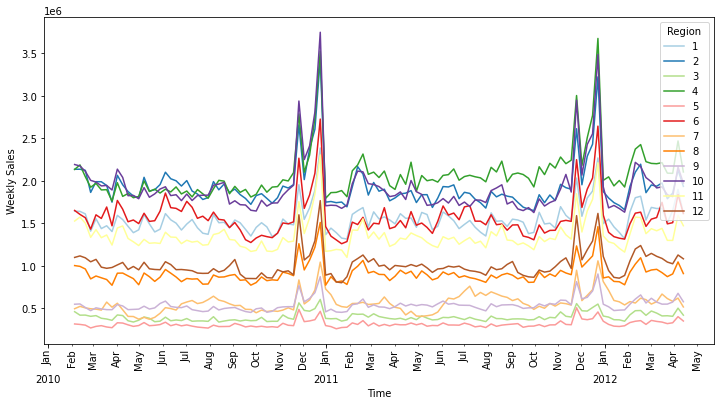

In [14]:
plot_timeseries_complex("Region", "Weekly_Sales", df, "Date")

,Region,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,151315
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,151315
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,151315
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,151315
...,...,...,...,...,...,...,...,...
110,1,2012-03-16,1677472.78,64.74,3.734,221.211813,7.348,151315
111,1,2012-03-23,1511068.07,65.93,3.787,221.286413,7.348,151315
112,1,2012-03-30,1649604.63,67.61,3.845,221.361012,7.348,151315
113,1,2012-04-06,1899676.88,70.43,3.891,221.435611,7.143,151315


C:\Users\XA155XB\Anaconda3\envs\walmart2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\XA155XB\Anaconda3\envs\walmart2\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


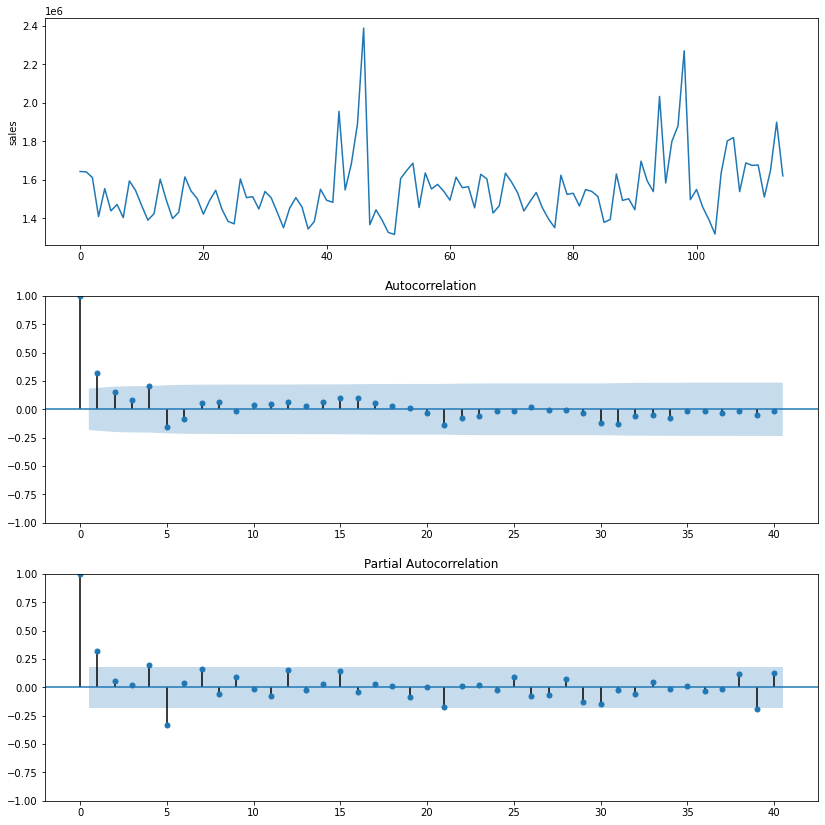

In [22]:
plot_timeseries_analysis(df_region1["Weekly_Sales"].values)

In [20]:
df

,Region,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,151315
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,151315
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,151315
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,151315
...,...,...,...,...,...,...,...,...
1375,12,2012-03-16,1088498.52,64.44,4.273,130.826193,12.187,112238
1376,12,2012-03-23,1045419.87,56.26,4.038,130.896645,12.187,112238
1377,12,2012-03-30,1025382.22,64.36,4.294,130.967097,12.187,112238
1378,12,2012-04-06,1128765.71,64.05,4.121,131.037548,11.627,112238


In [24]:
df2 = pd.read_csv("../walmart_sales/train.csv")

In [52]:
temp = df2.groupby(["Region"]).agg(["nunique"])

In [55]:
temp.loc[:, ("DMZ", "nunique")]

Region
1     77
2     78
3     72
4     78
5     72
6     77
7     75
8     76
9     73
10    77
11    78
12    74
Name: (DMZ, nunique), dtype: int64

In [44]:
temp = df2.groupby(["Region"])["DMZ"].nunique()

In [45]:
temp

Region
1     77
2     78
3     72
4     78
5     72
6     77
7     75
8     76
9     73
10    77
11    78
12    74
Name: DMZ, dtype: int64

In [46]:
type(temp)

pandas.core.series.Series

In [56]:
temp = df2.groupby(["Region"]).nunique()

In [59]:
temp = temp.reset_index()

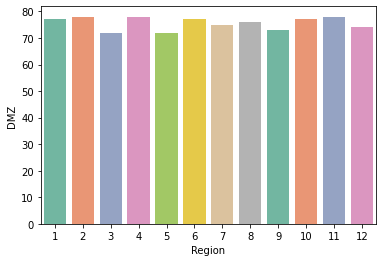

In [70]:
pal = sns.color_palette("Set2")
sns.barplot(x="Region", y = "DMZ", data=temp, order=temp["Region"], palette=pal)